<a href="https://colab.research.google.com/github/Monalika-P/Extending-existing-tf-model-with-more-classes/blob/main/Extending_existing_tf_model_with_more_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author - Monalika P

### Connecting to kaggle

In [1]:
from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
! kaggle datasets download -d alessiocorrado99/animals10

 99% 579M/586M [00:15<00:00, 12.2MB/s]
100% 586M/586M [00:15<00:00, 38.9MB/s]


In [ ]:
! unzip /content/animals10.zip

### Importing the dependencies

In [4]:
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt
import cv2
import os
import pickle
import pandas as pd
from tqdm import tqdm
%matplotlib inline

In [5]:
img_size = 100 #Setting all the images to 300 pixels

### Defining function to get data

In [6]:
classes = []

In [7]:
def get_data(data_dir):
  data = []
  count = 0
  print(os.path.basename(data_dir))
  folder = os.path.basename(data_dir)
  classes.append(folder)
  print(folder)
  for img in os.listdir(data_dir):
    try:
      count += 1
      image_array = cv2.imread(os.path.join(data_dir, img), cv2.IMREAD_COLOR)
      resized_array = cv2.resize(image_array, (img_size, img_size))
      data.append([resized_array, folder])

    except Exception as e:
      print(e)

  print("Collected",count,"no of images")

  return np.array(data)


In [8]:
data = get_data('/content/raw-img/cane')

cane
cane
Collected 4863 no of images


In [9]:
classes

['cane']

Text(0.5, 1.0, 'cane')

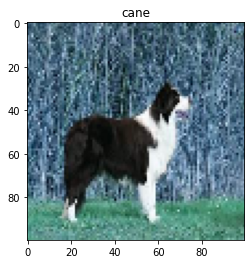

In [10]:
plt.imshow(data[4][0])
plt.title(data[3][1])

In [11]:
data = pd.DataFrame(data)

In [12]:
data.head()

,0,1
0,"[[[94, 56, 106], [92, 54, 104], [105, 67, 117]...",cane
1,"[[[241, 254, 254], [237, 249, 251], [228, 240,...",cane
2,"[[[14, 27, 24], [14, 25, 23], [22, 33, 31], [2...",cane
3,"[[[253, 253, 253], [253, 253, 253], [253, 253,...",cane
4,"[[[65, 96, 119], [80, 111, 132], [79, 110, 131...",cane


In [13]:
data2 = get_data('/content/raw-img/cavallo')

cavallo
cavallo
Collected 2623 no of images


In [14]:
classes

['cane', 'cavallo']

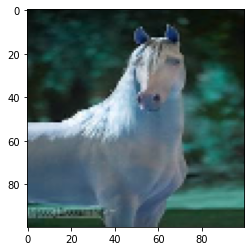

In [15]:
plt.imshow(data2[6][0])